In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
from predrain import *
sz = 256
nt = 10
bs = 6
num_gpus = 1
gpu_start = 0
pred_mode = 'skip'

In [3]:
mt = ModelType.PredNetLeakyRelu

In [4]:
P = Predrain()
P.set_config(sz, nt, bs, mt, num_gpus, gpu_start, pred_mode, allow_growth=False)

In [7]:
P.get_data(pred_mode=pred_mode, idx=3)

((<tf.Tensor 'IteratorGetNext:0' shape=(?, 10, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros:0' shape=(6, 1) dtype=float32>),
 (<tf.Tensor 'IteratorGetNext_1:0' shape=(?, 10, 256, 256, 1) dtype=float32>,
  <tf.Tensor 'zeros_1:0' shape=(6, 1) dtype=float32>),
 22500,
 2500)

In [6]:
P.get_model(mt, output_mode='prediction')

> /home/zyc/jupyter/tianchi/pred-rain/yang/models/prednet_refactored.py(249)call()
    247     def call(self, a, states, training=None):
    248         set_trace()
--> 249         r_tm1 = states[:self.nb_layers]
    250         c_tm1 = states[self.nb_layers:2*self.nb_layers]
    251         e_tm1 = states[2*self.nb_layers:3*self.nb_layers]



ipdb>  ll


    247     def call(self, a, states, training=None):
    248         set_trace()
--> 249         r_tm1 = states[:self.nb_layers]
    250         c_tm1 = states[self.nb_layers:2*self.nb_layers]
    251         e_tm1 = states[2*self.nb_layers:3*self.nb_layers]
    252 
    253         if self.extrap_start_time is not None:
    254             t = states[-1]
    255             a = K.switch(t >= self.t_extrap, states[-2], a)  # if past self.extrap_start_time, the previous prediction will be treated as the actual
    256         # set_trace()
    257         c = []
    258         r = []
    259         e = []
    260 
    261         # Update R units starting from the top
    262         for l in reversed(range(self.nb_layers)):
    263             inputs = [r_tm1[l], e_tm1[l]]
    264             if l < self.nb_layers - 1:
    265                 inputs.append(r_up)
    266 
    267             inputs = K.concatenate(inputs, axis=self.channel_axis)
    268             i = self.conv_laye

ipdb>  u


> /usr/local/anaconda3/envs/pred-rain/lib/python3.6/site-packages/tensorflow/python/keras/layers/recurrent.py(737)step()
    735       def step(inputs, states):
    736         states = states[0] if len(states) == 1 and is_tf_rnn_cell else states
--> 737         output, new_states = self.cell.call(inputs, states, **kwargs)
    738         if not nest.is_sequence(new_states):
    739           new_states = [new_states]



ipdb>  ll


    735       def step(inputs, states):
    736         states = states[0] if len(states) == 1 and is_tf_rnn_cell else states
--> 737         output, new_states = self.cell.call(inputs, states, **kwargs)
    738         if not nest.is_sequence(new_states):
    739           new_states = [new_states]
    740         return output, new_states
    741 



ipdb>  u


> /usr/local/anaconda3/envs/pred-rain/lib/python3.6/site-packages/tensorflow/python/keras/backend.py(3184)rnn()
   3182 
   3183     time_steps = array_ops.shape(inputs)[0]
-> 3184     outputs, _ = step_function(inputs[0], initial_states + constants)
   3185     output_ta = tensor_array_ops.TensorArray(
   3186         dtype=outputs.dtype, size=time_steps, tensor_array_name='output_ta')



ipdb>  ll


   3036 @tf_export('keras.backend.rnn')
   3037 def rnn(step_function,
   3038         inputs,
   3039         initial_states,
   3040         go_backwards=False,
   3041         mask=None,
   3042         constants=None,
   3043         unroll=False,
   3044         input_length=None):
   3045   """Iterates over the time dimension of a tensor.
   3046 
   3047   Arguments:
   3048       step_function: RNN step function.
   3049           Args;
   3050               input; Tensor with shape `(samples, ...)` (no time dimension),
   3051                   representing input for the batch of samples at a certain
   3052                   time step.
   3053               states; List of tensors.
   3054           Returns;
   3055               output; Tensor with shape `(samples, output_dim)`
   3056                   (no time dimension).
   3057               new_states; List of tensors, same length and shapes
   3058                   as 'states'. The first state in the list must be the


ipdb>  step_function


<function RNN.call.<locals>.step at 0x7f7312b5f8c8>


ipdb>  RNN


*** NameError: name 'RNN' is not defined


ipdb>  u


> /usr/local/anaconda3/envs/pred-rain/lib/python3.6/site-packages/tensorflow/python/keras/layers/recurrent.py(750)call()
    748         mask=mask,
    749         unroll=self.unroll,
--> 750         input_length=timesteps)
    751     if self.stateful:
    752       updates = []



ipdb>  ll


    665   def call(self,
    666            inputs,
    667            mask=None,
    668            training=None,
    669            initial_state=None,
    670            constants=None):
    671     # input shape: `(samples, time (padded with zeros), input_dim)`
    672     # note that the .build() method of subclasses MUST define
    673     # self.input_spec and self.state_spec with complete input shapes.
    674     if isinstance(inputs, list):
    675       # get initial_state from full input spec
    676       # as they could be copied to multiple GPU.
    677       if self._num_constants is None:
    678         initial_state = inputs[1:]
    679       else:
    680         initial_state = inputs[1:-self._num_constants]
    681       if len(initial_state) == 0:
    682         initial_state = None
    683       inputs = inputs[0]
    684     if initial_state is not None:
    685       pass
    686     elif self.stateful:
    687       initial_state = self.states
    688     e

ipdb>  q


BdbQuit: 

In [ ]:
P.model.ce

In [ ]:
P.load(ModelType.PredNetLeakyRelu, 256, pred_mode, 2, by_name=True, comment='nt5_from_scratch')

In [8]:
x, y = P.trn_tensors
sess = K.get_session()
x_np = x.eval(session=sess)[0][None]

In [10]:
p = P.model.predict(x_np, verbose=1)
d = P.denorm(p)

AttributeError: 'NoneType' object has no attribute 'predict'

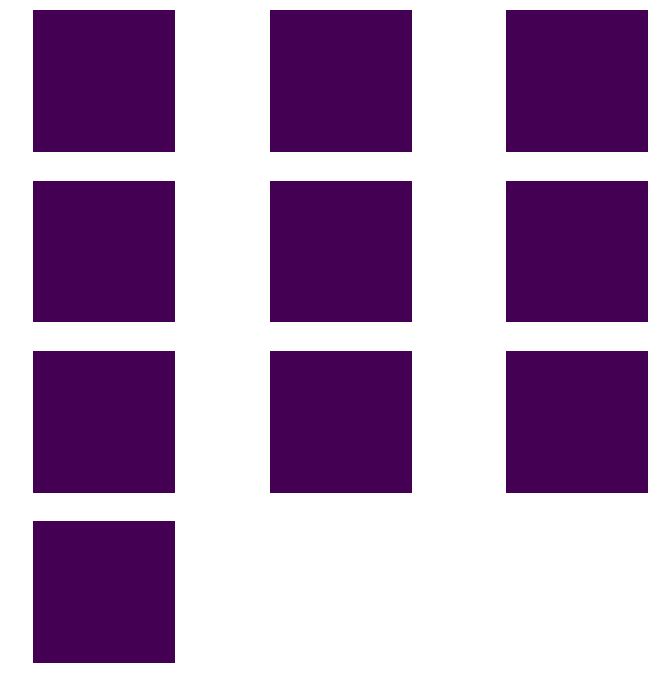

In [115]:
plots((d[0]*0.95 > 0.9).clip(0, 1), figsize=(12, 12), rows=4)

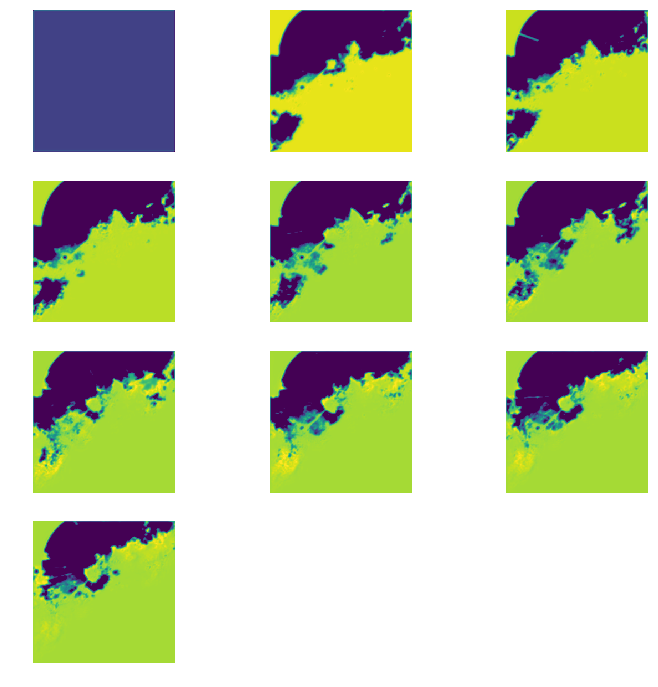

In [104]:
plots((d[0]), figsize=(12, 12), rows=4)

In [105]:
resized = [cv2.resize(o, (501, 501))[:,:,None] for o in d[0]]

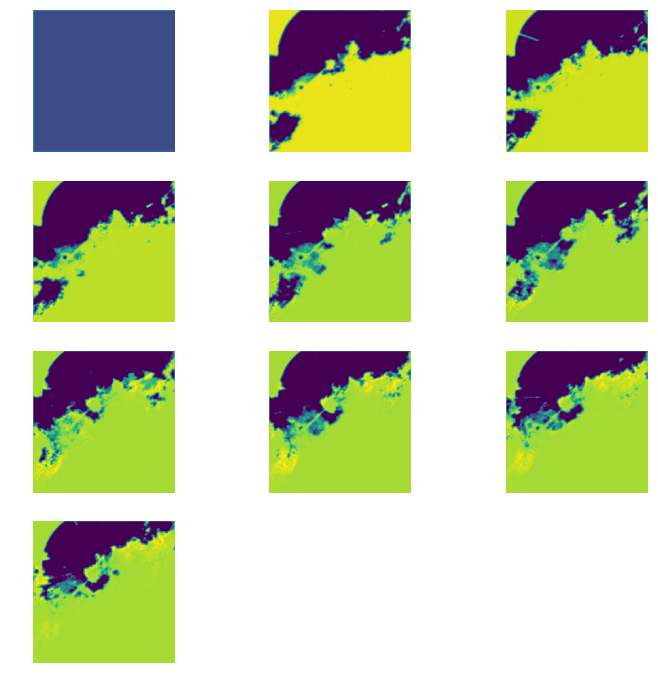

In [106]:
plots((resized), figsize=(12, 12), rows=4)

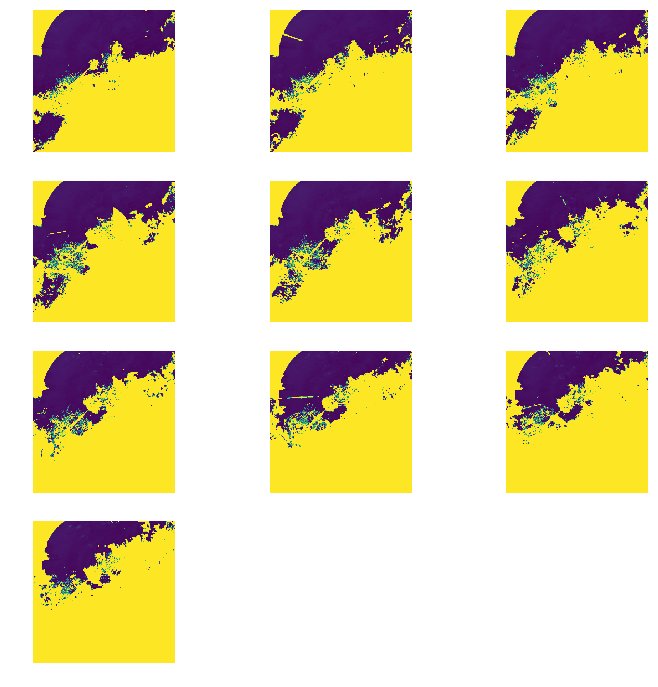

In [107]:
plots(x_np, figsize=(12, 12), rows=4)

In [88]:
x_np.shape

(1, 10, 256, 256, 1)

In [97]:
t = P.model.layers[1].cell

In [101]:
t.input_shape

AttributeError: The layer has never been called and thus has no defined input shape.